In [2]:
# 기본 import

from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [4]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


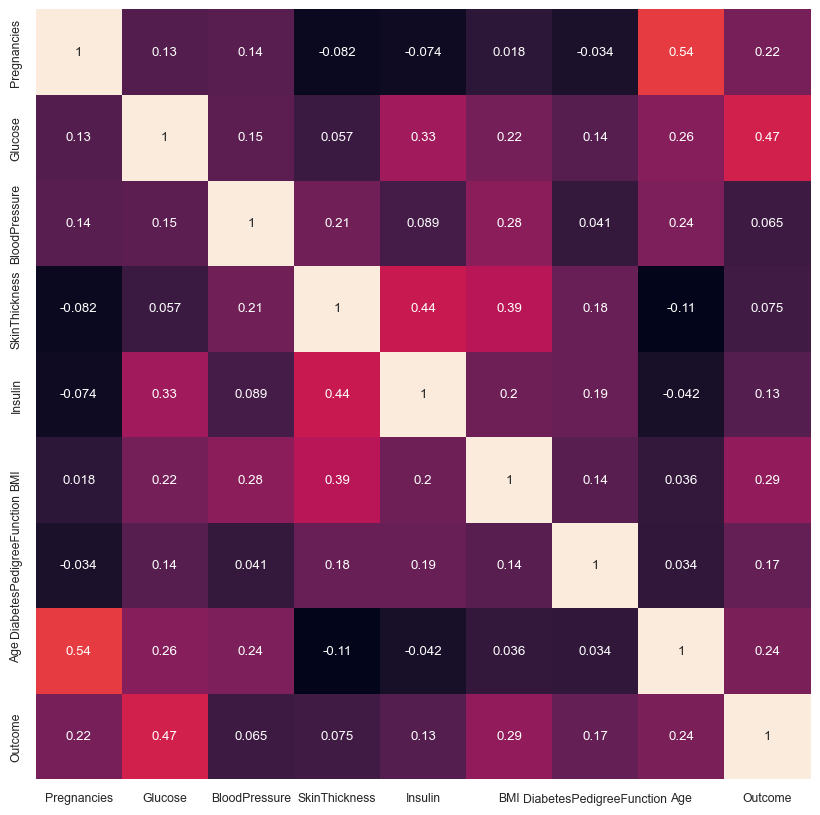

In [5]:
# 결측치 직관확인

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [8]:
# 데이터 분류

X=df.drop('Outcome',axis=1)
y=df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
print(X.head())
print(y.value_counts())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    500
1    268
Name: Outcome, dtype: int64


In [18]:
# classification 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [19]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7708333333333334
[[119  11]
 [ 33  29]]


In [20]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7916666666666666
[[115  15]
 [ 25  37]]


C:\Users\1563a\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)

print ("\n--- Radom Forest ---")
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.7708333333333334
[[116  14]
 [ 30  32]]


In [22]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.71875
[[102  28]
 [ 26  36]]


In [23]:
clf_dt = KNeighborsClassifier(n_neighbors=3)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- KNN Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- KNN Classifier ---
0.6979166666666666
[[100  30]
 [ 28  34]]


C:\Users\1563a\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [72]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/diabetes.csv")
df["Outcome"]=LabelEncoder().fit_transform(df["Outcome"]) ### 회귀 위한 데이터 숫자화

# 데이터 분류
X=df.drop('Outcome',axis=1).values
y = pd.get_dummies(df['Outcome']).values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
print(X)
print(y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[[0 1]
 [1 0]
 [0 1]
 ...
 [1 0]
 [0 1]
 [1 0]]


In [100]:
# 딥러닝 모델

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(X_train.shape[1],),activation='sigmoid'))
model.add(Dense(8,activation='sigmoid'))
model.add(Dense(4,activation='sigmoid'))
model.add(Dense(y_train.shape[1],activation='softmax'))

#model.compile(Adam(learning_rate=0.04),'binary_crossentropy',metrics=['accuracy'])
model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_109 (Dense)               │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224 (896.00 B)

 Trainable params: 224 (896.00 B)

 Non-trainable params: 0 (0.00 B)

In [101]:
# 딥러닝 훈련

model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=0)
y_pred_class = np.argmax(y_pred,axis=0)

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5032 - loss: 0.7382 - val_accuracy: 0.6724 - val_loss: 0.6315
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6340 - loss: 0.6622 - val_accuracy: 0.6724 - val_loss: 0.6373
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5946 - loss: 0.6783 - val_accuracy: 0.6724 - val_loss: 0.6330
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6353 - loss: 0.6555 - val_accuracy: 0.6724 - val_loss: 0.6327
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6165 - loss: 0.6689 - val_accuracy: 0.6724 - val_loss: 0.6318
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6415 - loss: 0.6523 - val_accuracy: 0.6724 - val_loss: 0.6332
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6512 - loss: 0.6472 - val_accuracy: 0.6724 - val_loss: 0.6357
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6765 - loss: 0.6377 - val_accuracy: 0.6724 - val_loss:

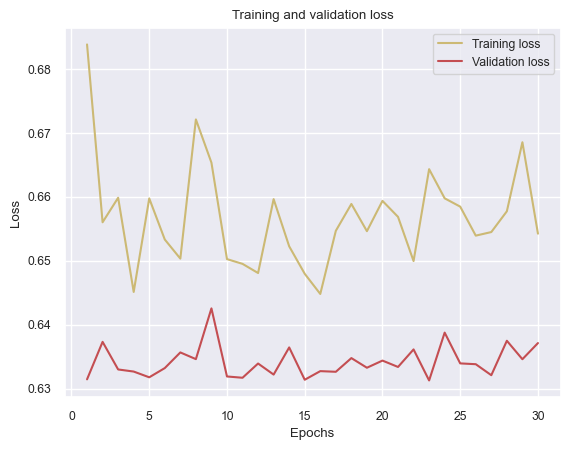

In [102]:
# 딥러닝 결과

import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [114]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/diabetes.csv")
df.drop('Outcome', axis=1, inplace=True)

# 데이터 분류
X=df.drop('BMI',axis=1).values
y = pd.get_dummies(df['BMI']).values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
print(X)
print(y)

[[  6.    148.     72.    ...   0.      0.627  50.   ]
 [  1.     85.     66.    ...   0.      0.351  31.   ]
 [  8.    183.     64.    ...   0.      0.672  32.   ]
 ...
 [  5.    121.     72.    ... 112.      0.245  30.   ]
 [  1.    126.     60.    ...   0.      0.349  47.   ]
 [  1.     93.     70.    ...   0.      0.315  23.   ]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [125]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_layer=Input(shape=(X_train.shape[1],))
layer1=Dense(50, activation="relu")(input_layer)
layer2=Dense(30, activation="relu")(layer1)
layer3=Dense(15, activation="relu")(layer2)
layer4=Dense(9, activation="relu")(layer3)
out_layer=Dense(y_train.shape[1], activation="softmax")(layer3)
model=Model(inputs=input_layer,outputs=out_layer)
model.compile(Adam(learning_rate=0.001),"categorical_crossentropy",metrics=["accuracy"])

In [126]:
model.fit(X_train,y_train, epochs=100, batch_size=2)

Epoch 1/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.0082 - loss: 8.4448    
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.0128 - loss: 5.4156
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.0192 - loss: 5.3526
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.0351 - loss: 5.3501
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.0421 - loss: 5.2913
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.0235 - loss: 5.1515
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.0187 - loss: 5.0816
Epoch 8/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.0388 - loss: 5.0517
Epoch 9/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.0317 - loss: 4.9128
Epoch 10/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.0374 - loss: 4.8574
Epoch 11/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.0283 - loss: 4.8902
Epoch 12/100
28

In [127]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print("test accuracy: ", test_acc)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.0111 - loss: 39.7639   
test accuracy:  0.015625
